In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data['Group'] = train_data['PassengerId'].str[:4].astype(float)
train_data['PeopleId'] = train_data['PassengerId'].str[-2:].astype(float)

test_data['Group'] = test_data['PassengerId'].str[:4].astype(float)
test_data['PeopleId'] = test_data['PassengerId'].str[-2:].astype(float)

train_data = train_data.drop('PassengerId', axis=1)
test_data = test_data.drop('PassengerId', axis=1)

In [4]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(random_state=42)
imputed1 = imputer.fit_transform(train_data[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']])
imputed2 = imputer.transform(test_data[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']])

df1 = pd.DataFrame(imputed1, columns=['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'])
df2 = pd.DataFrame(imputed2, columns=['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'])

In [5]:
train_data = train_data.drop(['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'], axis=1)
train_data = pd.concat([train_data,df1], axis=1)

test_data = test_data.drop(['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'], axis=1)
test_data = pd.concat([test_data,df2], axis=1)

In [6]:
train_data['Data'] = "train"
test_data['Data'] = "test"

all_data = pd.concat([train_data,test_data], axis=0)

all_data.replace({False: 0, True: 1}, inplace=True)

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(all_data), columns=['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'])

ValueError: could not convert string to float: 'Europa'

In [5]:
def my_analysis(dataset):
    df = pd.DataFrame()
    length = len(dataset.index)
    for col in dataset.columns:
        row_df = pd.DataFrame({'Datatype':dataset[col].dtype,
                                'NA values %':round(dataset[col].isna().sum()*100/length,2),
                                'Unique values':dataset[col].nunique(),
                                'frequent value':dataset[col].value_counts().index[0],
                                'contribution %':round(dataset[col].value_counts().iloc[0]*100/length,2),
                                'min value':'none' if dataset[col].dtype=='object' else dataset[col].min(),
                                'max value':'none' if dataset[col].dtype=='object' else dataset[col].max()
                                },
                                index=[col])
        df = pd.concat([df,row_df])
    return df

In [28]:
my_analysis(all_data)

,Datatype,NA values %,Unique values,frequent value,contribution %,min value,max value
HomePlanet,object,2.22,3,Earth,52.93,none,none
CryoSleep,float64,2.39,2,0.0,62.29,0.0,1.0
Cabin,object,2.31,9825,G/734/S,0.06,none,none
Destination,object,2.11,3,TRAPPIST-1e,68.40,none,none
Age,float64,2.08,80,18.0,3.82,0.0,79.0
VIP,float64,2.28,2,0.0,95.61,0.0,1.0
RoomService,float64,2.03,1578,0.0,64.02,0.0,14327.0
FoodCourt,float64,2.23,1953,0.0,62.81,0.0,29813.0
ShoppingMall,float64,2.36,1367,0.0,64.23,0.0,23492.0
Spa,float64,2.19,1679,0.0,61.18,0.0,22408.0


C:\Users\anike\AppData\Local\Temp\ipykernel_17924\409944989.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  billing_data['AgeGroup'] = pd.cut(billing_data['Age'], bin_edges, labels=bin_names)


<AxesSubplot: xlabel='AgeGroup', ylabel='VRDeck'>

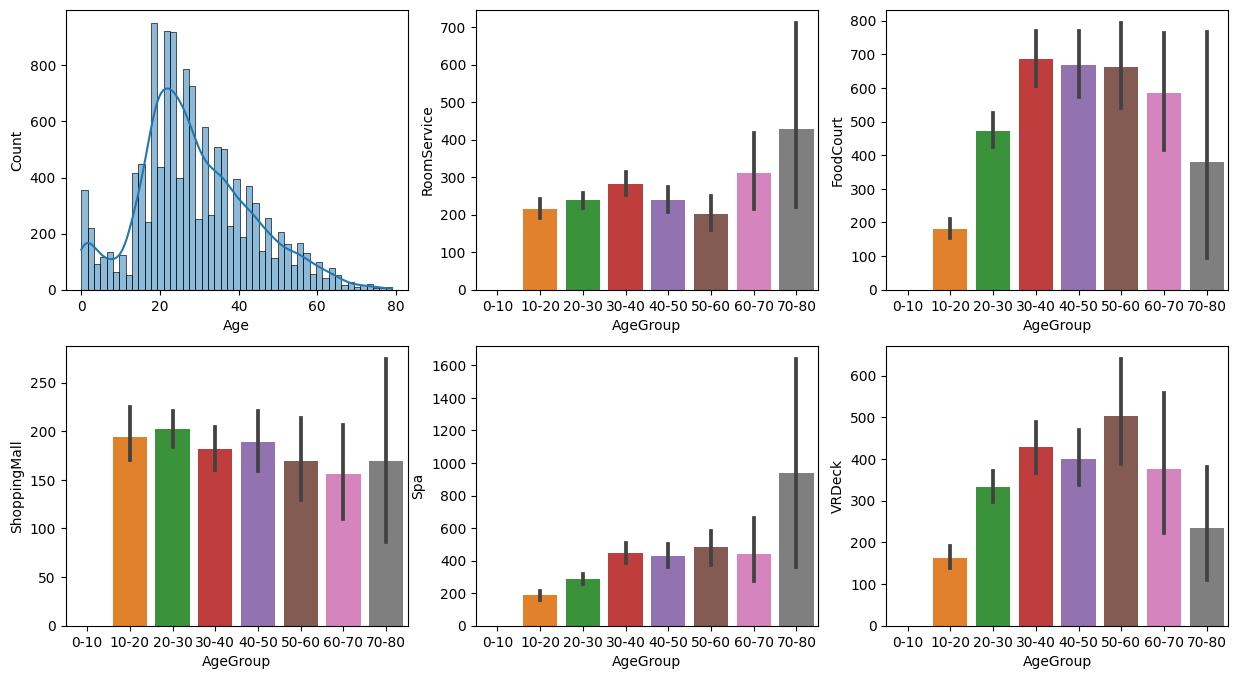

In [7]:
billing_data = all_data[['Age','HomePlanet','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']]

bin_edges = [0.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0]
bin_names = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80']
billing_data['AgeGroup'] = pd.cut(billing_data['Age'], bin_edges, labels=bin_names)

plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
sns.histplot(billing_data['Age'], kde=True)
plt.subplot(2,3,2)
sns.barplot(x='AgeGroup',y='RoomService', data=billing_data)
plt.subplot(2,3,3)
sns.barplot(x='AgeGroup',y='FoodCourt', data=billing_data)
plt.subplot(2,3,4)
sns.barplot(x='AgeGroup',y='ShoppingMall', data=billing_data)
plt.subplot(2,3,5)
sns.barplot(x='AgeGroup',y='Spa', data=billing_data)
plt.subplot(2,3,6)
sns.barplot(x='AgeGroup',y='VRDeck', data=billing_data)

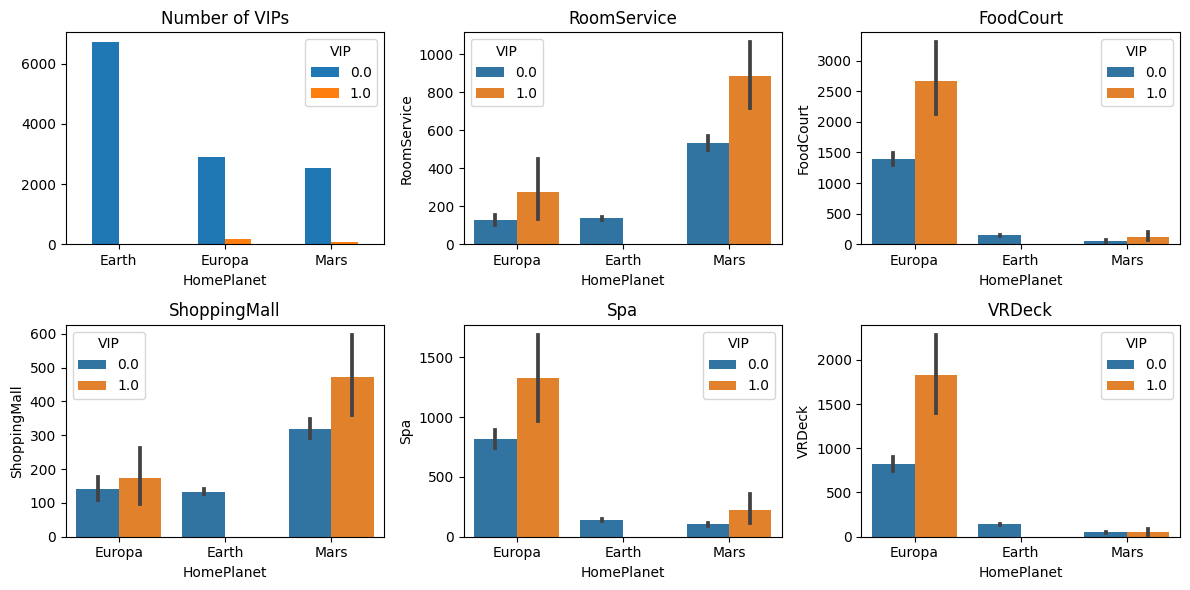

In [8]:
plt.figure(figsize=(12,6))
ax1 = plt.subplot(2,3,1)
ax1.set_title('Number of VIPs')
pd.crosstab(all_data['HomePlanet'],all_data['VIP']).plot(kind='bar', ax=ax1, rot=0)
ax2 = plt.subplot(2,3,2)
ax2.set_title('RoomService')
sns.barplot(x="HomePlanet", y="RoomService", hue="VIP", data=all_data)
ax3 = plt.subplot(2,3,3)
ax3.set_title('FoodCourt')
sns.barplot(x="HomePlanet", y="FoodCourt", hue="VIP", data=all_data)
ax4 = plt.subplot(2,3,4)
ax4.set_title('ShoppingMall')
sns.barplot(x="HomePlanet", y="ShoppingMall", hue="VIP", data=all_data)
ax5 = plt.subplot(2,3,5)
ax5.set_title('Spa')
sns.barplot(x="HomePlanet", y="Spa", hue="VIP", data=all_data)
ax6 = plt.subplot(2,3,6)
ax6.set_title('VRDeck')
sns.barplot(x="HomePlanet", y="VRDeck", hue="VIP", data=all_data)
plt.tight_layout()

In [9]:
test = all_data[['Age','HomePlanet','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']]

test['Age'].fillna(all_data['Age'].median(), inplace=True)
test['HomePlanet'].fillna(all_data['HomePlanet'].mode()[0], inplace=True)
test['VIP'].fillna(all_data['VIP'].mode()[0], inplace=True)

df = pd.get_dummies(test['HomePlanet'])
test = pd.concat([test, df], axis=1)

C:\Users\anike\AppData\Local\Temp\ipykernel_17924\1112236063.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'].fillna(all_data['Age'].median(), inplace=True)
C:\Users\anike\AppData\Local\Temp\ipykernel_17924\1112236063.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['HomePlanet'].fillna(all_data['HomePlanet'].mode()[0], inplace=True)
C:\Users\anike\AppData\Local\Temp\ipykernel_17924\1112236063.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

In [10]:
fillcolumns = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
for column in fillcolumns:
    columnlist = ['Age','HomePlanet','VIP']
    columnlist.append(column)
    train = all_data[columnlist]
    train.dropna(inplace=True)

    df = pd.get_dummies(train['HomePlanet'])
    train = pd.concat([train,df], axis=1)

    x_test = test[['Age','VIP','Earth','Europa','Mars']]

    y_data = train[column]
    x_data = train.drop([column,'HomePlanet'], axis=1)

    from sklearn.model_selection import train_test_split
    x_train, x_val, y_train, y_val = train_test_split(x_data,y_data,test_size=0.1,random_state=42)

    from xgboost import XGBRegressor

    xgb = XGBRegressor(n_estimators=500, early_stopping_rounds=5)
    xgb.fit(x_train,y_train,eval_set=[(x_val,y_val)])

    result = xgb.predict(x_test)

    x_test[column] = result
    all_data[column].fillna(x_test[column], inplace=True)

C:\Users\anike\AppData\Local\Temp\ipykernel_17924\2013856566.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.dropna(inplace=True)
C:\Users\anike\AppData\Local\Temp\ipykernel_17924\2013856566.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[column] = result
C:\Users\anike\AppData\Local\Temp\ipykernel_17924\2013856566.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

"''\n    from sklearn.model_selection import train_test_split\n    x_train, x_val, y_train, y_val = train_test_split(x_data,y_data,test_size=0.1,random_state=42)\n\n    from xgboost import XGBRegressor\n\n    xgb = XGBRegressor(n_estimators=500, early_stopping_rounds=5)\n    xgb.fit(x_train,y_train,eval_set=[(x_val,y_val)])\n\n    result = xgb.predict(x_test)\n\n    x_test[column] = result\n    all_data[column].fillna(x_test[column], inplace=True)"

In [7]:
all_data.isna().sum()

HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
Name             294
Transported     4277
Group              0
PeopleId           0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Data               0
dtype: int64

We will save this cleaned data in separate csv file

In [8]:
all_data['Deck'] = all_data['Cabin'].str[0]
all_data['Num'] = all_data['Cabin'].str[2:-2].astype(float)
all_data['Side'] = all_data['Cabin'].str[-1]

all_data = all_data.drop('Name', axis=1)

In [9]:
for col in ['HomePlanet','CryoSleep','Destination','Age','VIP']:
    all_data[col].fillna(all_data[col].mode()[0], inplace=True)

In [10]:
categorical_columns = ['HomePlanet','Destination']#,'Deck','Side']

all_data = pd.get_dummies(all_data, columns=categorical_columns)

In [11]:
train_data = all_data[all_data['Data']=="train"]
test_data = all_data[all_data['Data']=="test"]

train_data = train_data.drop('Data', axis=1)
test_data = test_data.drop(['Data','Transported'], axis=1)

In [12]:
train_data = train_data[train_data['Cabin'].notna()]
train_data = train_data.drop('Cabin', axis=1)
test_data = test_data.drop('Cabin', axis=1)

In [13]:
train_data.to_csv('cleaned_train.csv', index=False)
test_data.to_csv('cleaned_test.csv', index=False)